<a href="https://colab.research.google.com/github/venkatlokesh99/AI-FashionMNIST/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])


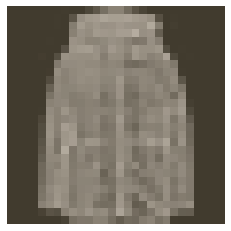

In [0]:
image, label = next(iter(trainloader))
print(image.shape)
helper.imshow(image[0,:]);

In [0]:
from torch import nn,optim
import torch.nn.functional as F

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,64)
    self.fc4=nn.Linear(64,10)

  def forward(self, x):

    x=x.view(x.shape[0],-1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=F.log_softmax(self.fc4(x),dim=1)

    return x

In [0]:
model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

In [0]:
epochs=10
for e in range(epochs):    
  running_loss=0;
  for images,labels in trainloader:
    logps=model(images)
    loss=criterion(logps,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print(f"Training Loss:{running_loss}")

Training Loss:285.01044449210167
Training Loss:272.5800495930016
Training Loss:264.03636010736227
Training Loss:254.30358888208866
Training Loss:249.6233266144991
Training Loss:240.7940122373402
Training Loss:238.1411934569478
Training Loss:230.2313827201724
Training Loss:225.2192771025002
Training Loss:215.86654449626803


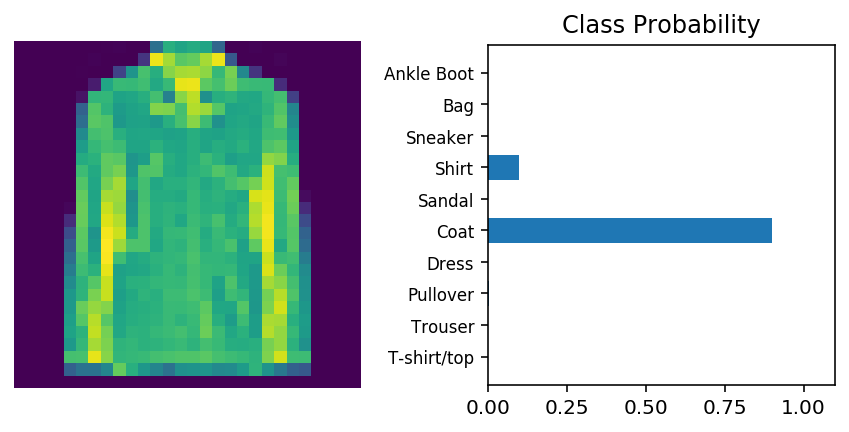

In [0]:
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')